__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?


__Решение__

In [1]:
import numpy as np

In [2]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

In [3]:
X = np.array(X)

In [4]:
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [5]:
y = np.array(y)

In [6]:
X.shape, y.shape

((10, 4), (10,))

In [7]:
def get_det_koef(x: np.ndarray, y: np.ndarray) -> float:
    ones = np.ones((x.shape[0], 1))
    x = np.hstack([ones, x])
    
    xtx = x.T.dot(x)
    xtx_inv = np.linalg.inv(xtx)
    
    b = xtx_inv.dot(x.T).dot(y)
    
    z = x.dot(b)
    E = y - z
    
    return 1 - E.var() / y.var()
    

In [8]:
from itertools import combinations

In [10]:
for i, j in combinations(range(X.shape[1]), 2):
    r = get_det_koef(X[:, [i, j]], y)
    
    print(f'{i}\t{j}\t{r}')

0	1	0.18113594742585215
0	2	0.7634246238793152
0	3	0.4532966783144077
1	2	0.5479482734039011
1	3	0.6062055761129931
2	3	0.622441987650532


In [11]:
k1 = 2
k2 = X.shape[0] - 2 - 1

R = get_det_koef(X[:, [0, 2]], y)
F = (R / k1) / ((1 - R) / k2)

F

11.29443912292265

In [12]:
from scipy import stats

In [13]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?


__Решение__

In [14]:
y1 = np.zeros(2509)
y1[np.arange(77)] = 1

y2 = np.zeros(1465)
y2[np.arange(60)] = 1

y = np.concatenate([y1, y2])

In [15]:
n1 = y1.shape[0]
n2 = y2.shape[0]
n = n1 + n2

n1, n2

(2509, 1465)

In [16]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y_mean = y.mean()

y1_mean, y2_mean, y_mean 

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

In [17]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

In [18]:
k = 2

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

In [19]:
F = sigma2_b / sigma2_w
F

2.9293243889013496

In [20]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.


__Решение__

In [21]:
data = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [22]:
for i in range(1, 5):
    x = data[f'x{i}']
    y = data[f'y{i}']
    
    print(f'Выборки {i}')
    print(f'Выборочные средние: {np.mean(x)}, {np.mean(y)}')
    print(f'Выборочные дисперсии: {np.var(x)}, {np.var(y)}')
    print(f'Коэффициент корреляции: {np.corrcoef(x, y)[0, 1]}\n')

Выборки 1
Выборочные средние: 9.0, 7.500909090909093
Выборочные дисперсии: 10.0, 3.7520628099173554
Коэффициент корреляции: 0.81642051634484

Выборки 2
Выборочные средние: 9.0, 7.50090909090909
Выборочные дисперсии: 10.0, 3.752390082644628
Коэффициент корреляции: 0.8162365060002427

Выборки 3
Выборочные средние: 9.0, 7.5
Выборочные дисперсии: 10.0, 3.747836363636364
Коэффициент корреляции: 0.8162867394895982

Выборки 4
Выборочные средние: 9.0, 7.500909090909091
Выборочные дисперсии: 10.0, 3.7484082644628103
Коэффициент корреляции: 0.8165214368885028



In [24]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

 Выборки 1: b0 = 3.0000909090909103, 	b1 = 0.5000909090909091
 Выборки 2: b0 = 3.00090909090909, 	b1 = 0.5
 Выборки 3: b0 = 3.0024545454545457, 	b1 = 0.4997272727272727
 Выборки 4: b0 = 3.0017272727272726, 	b1 = 0.4999090909090909



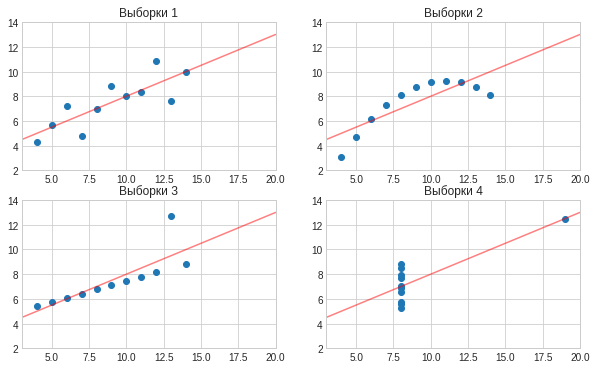

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ox = np.linspace(3, 20, 10 ** 4)

for i, ax in enumerate(axes.flatten()):
    i += 1
    
    x = data[f'x{i}']
    y = data[f'y{i}']
    
    b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
    b0 = np.mean(y) - b1 * np.mean(x)
    
    print(f' Выборки {i}: b0 = {b0}, \tb1 = {b1}')
    
    oy = b0 + b1 * ox
    
    ax.scatter(x, y)
    ax.plot(ox, oy, color='red', alpha=0.5)
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)
    
    ax.set_title(f'Выборки {i}')
    
print()